In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('ggplot')
import os
import pandas as pd
import numpy as np 
import pickle as pk
import glob
from fbprophet import Prophet
import sys
sys.path.append('../')
import wiki
from wiki import utils 
import multiprocessing as mp
total_proc = None
from tqdm import tqdm
from IPython.display import clear_output

In [3]:
PROPHET_PATH = '../data/prophet/'
DATA_PATH = '../data/'
RESULTS_PATH = 'results/'

In [4]:
train = pd.read_csv(DATA_PATH+'train_2.csv')

In [5]:
median_df = train.loc[:,['Page']].reset_index()
median_df.columns = ['page_index', 'Page']; median_df.head()

,page_index,Page
0,0,2NE1_zh.wikipedia.org_all-access_spider
1,1,2PM_zh.wikipedia.org_all-access_spider
2,2,3C_zh.wikipedia.org_all-access_spider
3,3,4minute_zh.wikipedia.org_all-access_spider
4,4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...


# Final_median_pred

In [6]:
median_df['FINAL_median_pred'] = np.nan_to_num(np.round(
                        np.nanmedian(
                        train.drop('Page', axis=1).values[:, -49:], axis=1)).reshape(-1,1)).astype(int)
median_df.head()

/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/site-packages/numpy/lib/function_base.py:3858: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


,page_index,Page,FINAL_median_pred
0,0,2NE1_zh.wikipedia.org_all-access_spider,22
1,1,2PM_zh.wikipedia.org_all-access_spider,19
2,2,3C_zh.wikipedia.org_all-access_spider,3
3,3,4minute_zh.wikipedia.org_all-access_spider,14
4,4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,16


# median_pred_60

In [7]:
median_df['median_pred_60'] = np.nan_to_num(np.round(
                        np.nanmedian(
                        train.drop('Page', axis=1).iloc[:,:-60].values[:, -49:], axis=1)).reshape(-1,1)).astype(int)
median_df.head()

/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/site-packages/numpy/lib/function_base.py:3858: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


,page_index,Page,FINAL_median_pred,median_pred_60
0,0,2NE1_zh.wikipedia.org_all-access_spider,22,24
1,1,2PM_zh.wikipedia.org_all-access_spider,19,24
2,2,3C_zh.wikipedia.org_all-access_spider,3,3
3,3,4minute_zh.wikipedia.org_all-access_spider,14,15
4,4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,16,14


In [8]:
print(median_df.FINAL_median_pred.sort_values(ascending=False).head())
print(np.log(median_df.FINAL_median_pred.sort_values(ascending=False).head()))
print(median_df.median_pred_60.sort_values(ascending=False).head())

38573     16311800
9774      14326237
39180      2149652
74114      1889542
139119     1788698
Name: FINAL_median_pred, dtype: int64
38573     16.607399
9774      16.477603
39180     14.580817
74114     14.451845
139119    14.396999
Name: FINAL_median_pred, dtype: float64
38573     16368403
9774      14207780
39180      2274289
74114      2164207
139119     1915254
Name: median_pred_60, dtype: int64


In [9]:
np.exp(709)

8.2184074615549724e+307

In [10]:
np.exp(710)

/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


inf

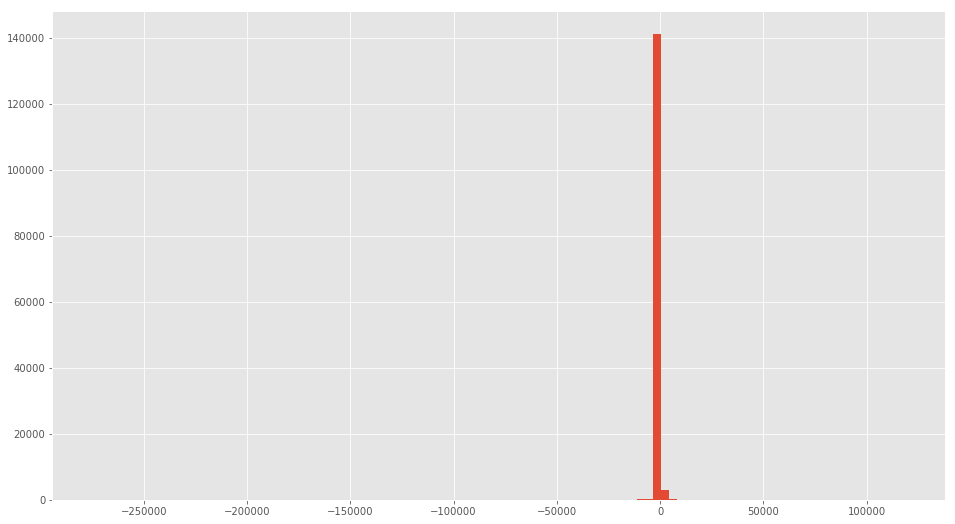

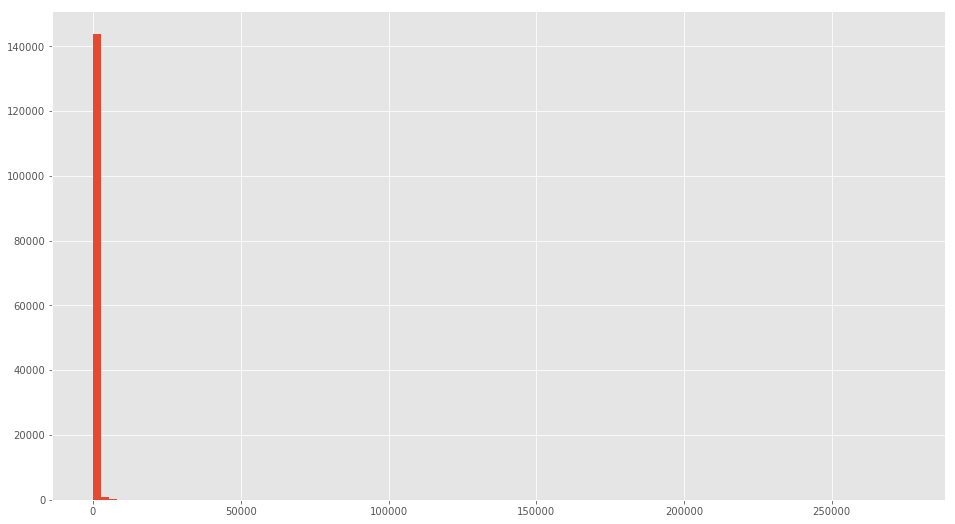

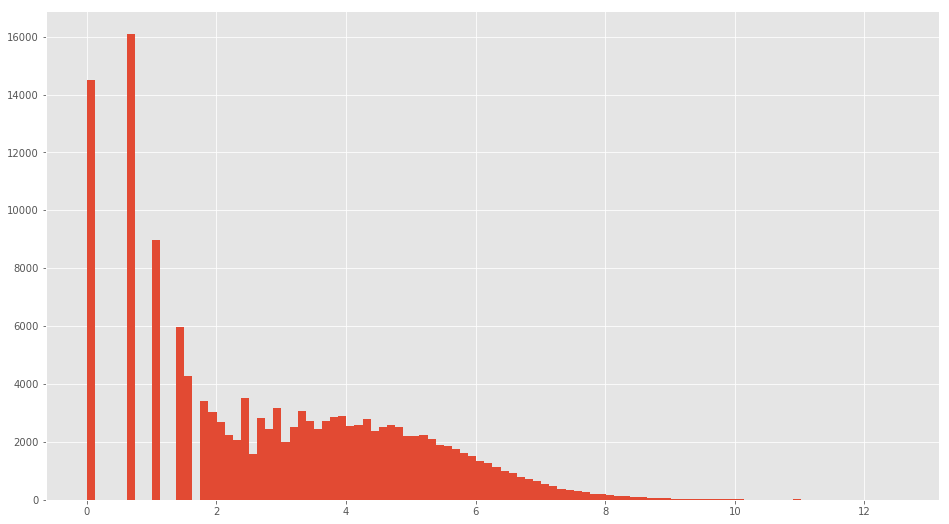

In [11]:
(median_df.FINAL_median_pred - median_df.median_pred_60).sort_values().head()
(median_df.FINAL_median_pred - median_df.median_pred_60).hist(bins=100)
plt.show()
np.abs((median_df.FINAL_median_pred - median_df.median_pred_60)).hist(bins=100)
plt.show()
np.log1p((np.abs((median_df.FINAL_median_pred - median_df.median_pred_60)))).hist(bins=100)

# median_pred_30

In [12]:
median_df['median_pred_30'] = np.nan_to_num(np.round(
                        np.nanmedian(
                        train.drop('Page', axis=1).iloc[:,:-30].values[:, -49:], axis=1)).reshape(-1,1)).astype(int)
median_df.head()

/home/ubuntu/miniconda3/envs/basev1/lib/python3.6/site-packages/numpy/lib/function_base.py:3858: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


,page_index,Page,FINAL_median_pred,median_pred_60,median_pred_30
0,0,2NE1_zh.wikipedia.org_all-access_spider,22,24,22
1,1,2PM_zh.wikipedia.org_all-access_spider,19,24,18
2,2,3C_zh.wikipedia.org_all-access_spider,3,3,3
3,3,4minute_zh.wikipedia.org_all-access_spider,14,15,14
4,4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,16,14,12


In [13]:
print(median_df.FINAL_median_pred.sort_values(ascending=False).head())
print(np.log(median_df.FINAL_median_pred.sort_values(ascending=False).head()))
print(median_df.median_pred_30.sort_values(ascending=False).head())

38573     16311800
9774      14326237
39180      2149652
74114      1889542
139119     1788698
Name: FINAL_median_pred, dtype: int64
38573     16.607399
9774      16.477603
39180     14.580817
74114     14.451845
139119    14.396999
Name: FINAL_median_pred, dtype: float64
38573     16154397
9774      14000966
39180      2177619
74114      2024449
139119     1821559
Name: median_pred_30, dtype: int64


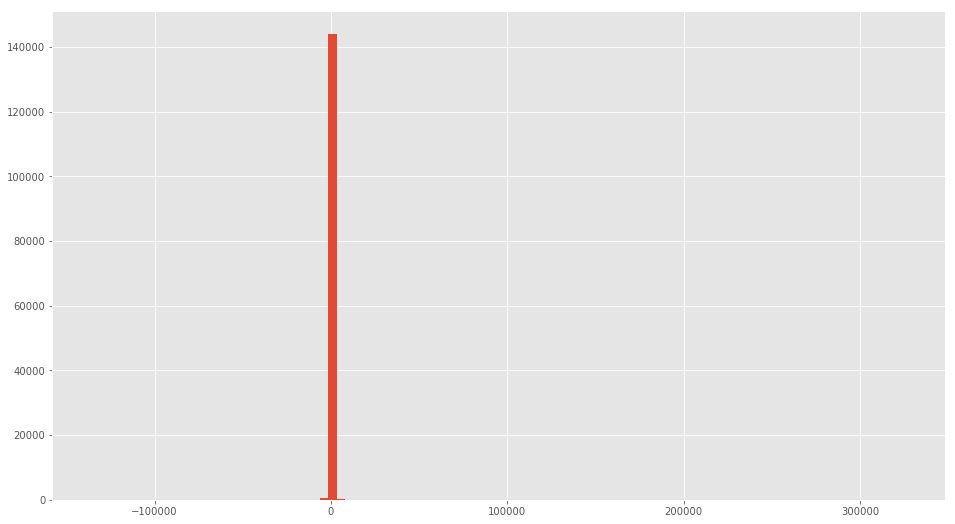

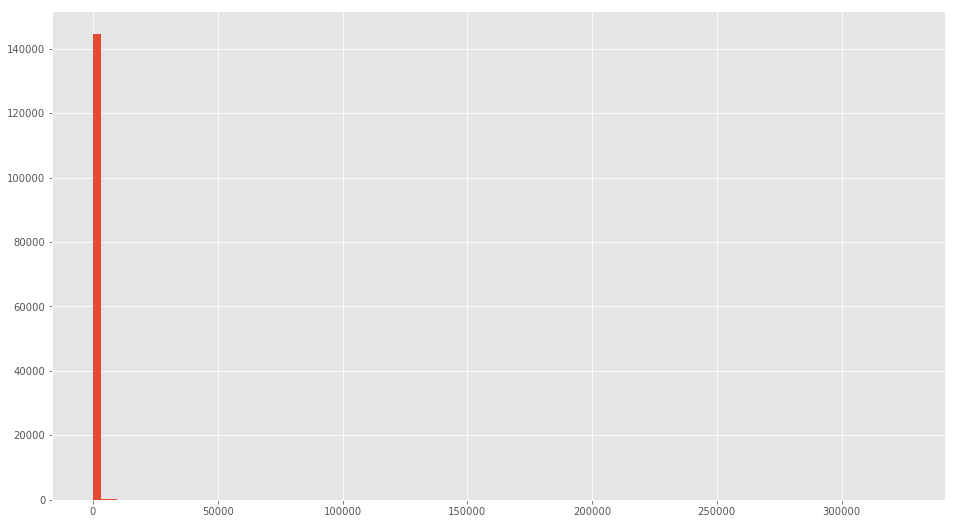

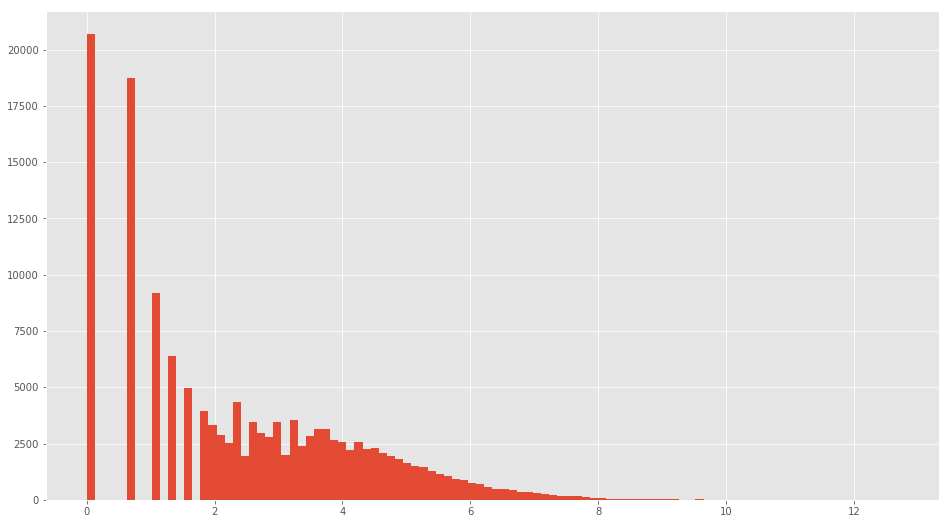

In [14]:
(median_df.FINAL_median_pred - median_df.median_pred_30).sort_values().head()
(median_df.FINAL_median_pred - median_df.median_pred_30).hist(bins=100)
plt.show()
np.abs((median_df.FINAL_median_pred - median_df.median_pred_30)).hist(bins=100)
plt.show()
np.log1p((np.abs((median_df.FINAL_median_pred - median_df.median_pred_30)))).hist(bins=100)

# Calculate SMAPES

In [15]:
train2 = train.iloc[:,1:]; train2.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,37.0,58.0,25.0,23.0,25.0,47.0,44.0,26.0,24.0,21.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,14.0,34.0,16.0,31.0,34.0,33.0,32.0,29.0,34.0,25.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,6.0,23.0,11.0,8.0,6.0,13.0,12.0,8.0,12.0,9.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,21.0,42.0,23.0,17.0,11.0,21.0,20.0,20.0,110.0,15.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,41.0,25.0,22.0,20.0,24.0,29.0,20.0,17.0,24.0


In [16]:
#median_df.apply(lambda x: train2.iloc[x[0]][1], axis=1)

In [17]:
median_df.head()

,page_index,Page,FINAL_median_pred,median_pred_60,median_pred_30
0,0,2NE1_zh.wikipedia.org_all-access_spider,22,24,22
1,1,2PM_zh.wikipedia.org_all-access_spider,19,24,18
2,2,3C_zh.wikipedia.org_all-access_spider,3,3,3
3,3,4minute_zh.wikipedia.org_all-access_spider,14,15,14
4,4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,16,14,12


In [35]:
def smape_60_to_0(train2, median_df):
    denominator = train2.iloc[:,-60:].add(median_df.median_pred_60, axis=0) / 200
    diff = np.abs(train2.iloc[:,-60:].subtract(median_df.median_pred_60, axis=0)) / denominator
    diff[denominator == 0] = 0.0
    #return np.nanmean(diff, axis=0)
    return diff.mean(axis=1, skipna=True)

In [36]:
smape_60_to_0(train2, median_df)

0          32.278432
1          42.847863
2          64.305367
3          32.250349
4          48.547274
5          42.083736
6          58.231657
7          62.439085
8          30.724366
9          30.923810
10         45.714298
11         47.412766
12         43.508904
13         43.575663
14         25.960669
15         46.337220
16         44.225563
17         39.014286
18         43.410573
19         39.996090
20         58.670358
21         28.611744
22         32.406739
23         29.821995
24         99.190064
25         32.765110
26         45.388256
27         36.100515
28         46.623730
29         32.499704
             ...    
145033     62.677460
145034     55.323954
145035    103.166667
145036    108.261905
145037     80.009047
145038     56.250498
145039     72.332789
145040     77.394903
145041     57.195471
145042     40.137853
145043     74.206839
145044     66.258024
145045     63.652748
145046     51.044635
145047     67.460817
145048     50.626472
145049     51

In [37]:
median_df['smape_60_to_0'] = smape_60_to_0(train2, median_df); median_df.head()

,page_index,Page,FINAL_median_pred,median_pred_60,median_pred_30,smape_60_to_0
0,0,2NE1_zh.wikipedia.org_all-access_spider,22,24,22,32.278432
1,1,2PM_zh.wikipedia.org_all-access_spider,19,24,18,42.847863
2,2,3C_zh.wikipedia.org_all-access_spider,3,3,3,64.305367
3,3,4minute_zh.wikipedia.org_all-access_spider,14,15,14,32.250349
4,4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,16,14,12,48.547274


In [76]:
median_df['smape_60_to_0'].mean()

41.043204039840212

In [38]:
def smape_30_to_0(train2, median_df):
    denominator = train2.iloc[:,-30:].add(median_df.median_pred_30, axis=0) / 200
    diff = np.abs(train2.iloc[:,-30:].subtract(median_df.median_pred_30, axis=0)) / denominator
    diff[denominator == 0] = 0.0
    #return np.nanmean(diff, axis=0)
    return diff.mean(axis=1, skipna=True)

In [39]:
median_df['smape_30_to_0'] = smape_30_to_0(train2, median_df); median_df.head()

,page_index,Page,FINAL_median_pred,median_pred_60,median_pred_30,smape_60_to_0,smape_30_to_0
0,0,2NE1_zh.wikipedia.org_all-access_spider,22,24,22,32.278432,33.460075
1,1,2PM_zh.wikipedia.org_all-access_spider,19,24,18,42.847863,38.381387
2,2,3C_zh.wikipedia.org_all-access_spider,3,3,3,64.305367,66.482751
3,3,4minute_zh.wikipedia.org_all-access_spider,14,15,14,32.250349,34.090675
4,4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,16,14,12,48.547274,63.728757


In [42]:
median_df['smape_30_to_0'].mean()

37.916231179407006

In [43]:
def smape_60_to_30(train2, median_df):
    denominator = train2.iloc[:,-60:-30].add(median_df.median_pred_60, axis=0) / 200
    diff = np.abs(train2.iloc[:,-60:-30].subtract(median_df.median_pred_60, axis=0)) / denominator
    diff[denominator == 0] = 0.0
    #return np.nanmean(diff, axis=0)
    return diff.mean(axis=1, skipna=True)

In [44]:
median_df['smape_60_to_30'] = smape_60_to_30(train2, median_df); median_df.head()

,page_index,Page,FINAL_median_pred,median_pred_60,median_pred_30,smape_60_to_0,smape_30_to_0,smape_60_to_30
0,0,2NE1_zh.wikipedia.org_all-access_spider,22,24,22,32.278432,33.460075,31.784579
1,1,2PM_zh.wikipedia.org_all-access_spider,19,24,18,42.847863,38.381387,47.778097
2,2,3C_zh.wikipedia.org_all-access_spider,3,3,3,64.305367,66.482751,62.127983
3,3,4minute_zh.wikipedia.org_all-access_spider,14,15,14,32.250349,34.090675,31.105196
4,4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,16,14,12,48.547274,63.728757,42.661346


In [45]:
median_df['smape_60_to_30'].mean()

39.433807046929097

In [68]:
train2.iloc[:,:-60].shape[1]

733

In [69]:
median_df['nans_start_to_60'] = train2.iloc[:,:-60].shape[1] - train2.iloc[:,:-60].count(axis=1)

In [70]:
median_df['nans_60_to_30'] = train2.iloc[:,-60:-30].shape[1] - train2.iloc[:,-60:-30].count(axis=1)

In [71]:
median_df['nans_30_to_0'] = train2.iloc[:,-30:].shape[1] - train2.iloc[:,-30:].count(axis=1)

In [72]:
median_df.head()

,page_index,Page,FINAL_median_pred,median_pred_60,median_pred_30,smape_60_to_0,smape_30_to_0,smape_60_to_30,nans_start_to_60,nans_60_to_30,nans_30_to_0
0,0,2NE1_zh.wikipedia.org_all-access_spider,22,24,22,32.278432,33.460075,31.784579,0,0,0
1,1,2PM_zh.wikipedia.org_all-access_spider,19,24,18,42.847863,38.381387,47.778097,0,0,0
2,2,3C_zh.wikipedia.org_all-access_spider,3,3,3,64.305367,66.482751,62.127983,0,0,0
3,3,4minute_zh.wikipedia.org_all-access_spider,14,15,14,32.250349,34.090675,31.105196,0,0,0
4,4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,16,14,12,48.547274,63.728757,42.661346,291,0,0


In [74]:
median_df.to_feather('../data/median_for_60_and_30.f')

In [75]:
median_df.columns

Index(['page_index', 'Page', 'FINAL_median_pred', 'median_pred_60',
       'median_pred_30', 'smape_60_to_0', 'smape_30_to_0', 'smape_60_to_30',
       'nans_start_to_60', 'nans_60_to_30', 'nans_30_to_0'],
      dtype='object')